In [4]:
!pip install pandas matplotlib scikit-learn prophet cmdstanpy


In [5]:
import pandas as pd
from prophet import Prophet
import pickle

df = pd.read_csv("mock_data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values("Date")

models = {}
for borewell in df['Borewell_NAME'].unique():
    temp = df[df['Borewell_NAME']==borewell][['Date','Water_Level_m']]
    temp = temp.rename(columns={'Date':'ds','Water_Level_m':'y'})
    m = Prophet(daily_seasonality=True)
    m.fit(temp)
    models[borewell] = m

with open("prophet_models.pkl", "wb") as f:
    pickle.dump(models, f)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1377vf57/mz4mle2_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1377vf57/3qwppeby.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85360', 'data', 'file=/tmp/tmp1377vf57/mz4mle2_.json', 'init=/tmp/tmp1377vf57/3qwppeby.json', 'output', 'file=/tmp/tmp1377vf57/prophet_modelzle0w2_5/prophet_model-20250920015247.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:52:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:52:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with year

In [6]:
from google.colab import files
files.download("prophet_models.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
from google.colab import files

uploaded = files.upload()   # upload mock_data.csv
uploaded = files.upload()   # upload prophet_models.pkl


Saving mock_data.csv to mock_data (1).csv


Saving prophet_models.pkl to prophet_models (1).pkl


In [8]:
import pandas as pd
import pickle

# Load dataset
df = pd.read_csv("mock_data.csv")
df['Date'] = pd.to_datetime(df['Date'])

# Load trained Prophet models
with open("prophet_models.pkl", "rb") as f:
    models = pickle.load(f)


In [9]:
borewell = "Borewell_A"   # adjust to your dataset
model = models[borewell]


In [10]:
future = model.make_future_dataframe(periods=7)  # next 7 days
forecast = model.predict(future)

forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(10)


,ds,yhat,yhat_lower,yhat_upper
28,2025-08-29,7.533271,4.754409,10.326930
29,2025-08-30,8.050473,5.208407,10.560083
30,2025-08-31,12.901753,9.978693,15.745973
31,2025-09-01,9.072452,6.365535,12.011696
32,2025-09-02,9.499465,6.468487,12.544965
33,2025-09-03,7.723887,4.917404,10.713816
34,2025-09-04,9.798302,6.943673,12.720560
35,2025-09-05,7.597697,4.787727,10.375246
36,2025-09-06,8.114899,5.262770,10.816669
37,2025-09-07,12.966179,10.038367,15.888333


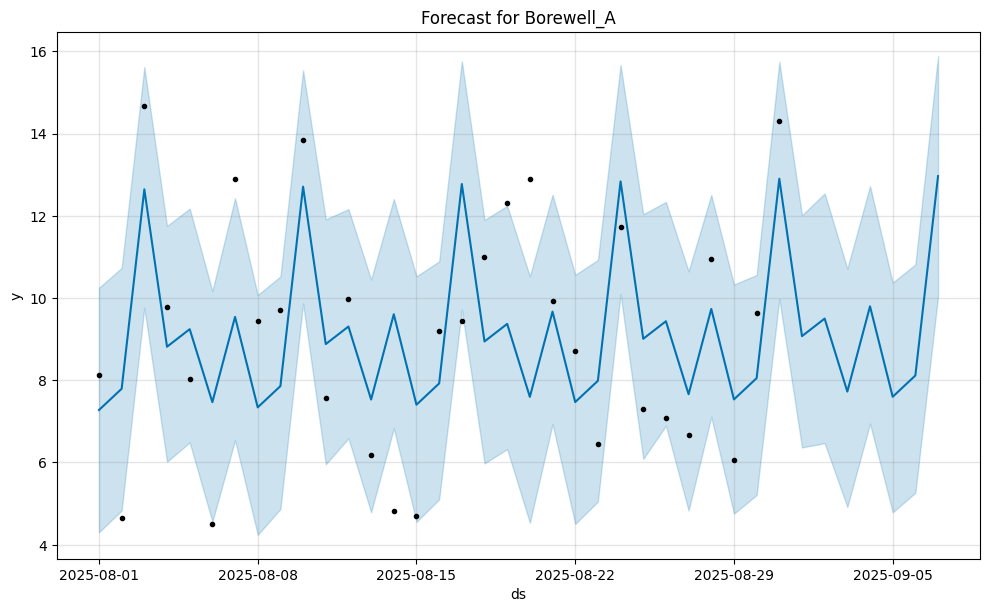

In [11]:
import matplotlib.pyplot as plt

fig = model.plot(forecast)
plt.title(f"Forecast for {borewell}")
plt.show()


In [3]:
import pandas as pd
from prophet import Prophet

# Load data
df = pd.read_csv("mock_data.csv")

# Ensure date column is datetime
df["Date"] = pd.to_datetime(df["Date"])

def train_and_predict(df, borewell_name, column, future_date):
    # Filter only selected borewell
    borewell_df = df[df["Borewell_NAME"] == borewell_name]

    if borewell_df.empty:
        return {"error": f"No data found for borewell: {borewell_name}"}

    # Prepare data for Prophet
    data = borewell_df[["Date", column]].dropna()
    data = data.rename(columns={"Date": "ds", column: "y"})

    # Train Prophet model
    model = Prophet(daily_seasonality=True)
    model.fit(data)

    # Make future prediction
    future = pd.DataFrame({"ds": [future_date]})
    forecast = model.predict(future)

    return {
        "Borewell": borewell_name,
        "Date": future_date,
        f"predicted_{column}": forecast["yhat"].iloc[0],
        f"{column}_lower": forecast["yhat_lower"].iloc[0],
        f"{column}_upper": forecast["yhat_upper"].iloc[0],
    }

# ---- User input ----
borewell = input("Enter Borewell_NAME: ")
date_input = input("Enter a future date (YYYY-MM-DD): ")
future_date = pd.to_datetime(date_input)

# Predict for all columns
results = {}
for col in ["Water_Level_m", "Rainfall_mm", "pH", "Dissolved_Oxygen_mg_L"]:
    results[col] = train_and_predict(df, borewell, col, future_date)

print("\nPrediction Results:")
for col, res in results.items():
    print(res)


Enter Borewell_NAME: Borewell_A
Enter a future date (YYYY-MM-DD): 2025-12-25


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1377vf57/bvc7dp_p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1377vf57/b_qdvv0l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40026', 'data', 'file=/tmp/tmp1377vf57/bvc7dp_p.json', 'init=/tmp/tmp1377vf57/b_qdvv0l.json', 'output', 'file=/tmp/tmp1377vf57/prophet_modelwvav0ph9/prophet_model-20250920015050.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:50:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:50:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with year


Prediction Results:
{'Borewell': 'Borewell_A', 'Date': Timestamp('2025-12-25 00:00:00'), 'predicted_Water_Level_m': np.float64(10.829111871240585), 'Water_Level_m_lower': np.float64(8.27026888282306), 'Water_Level_m_upper': np.float64(13.5393338209827)}
{'Borewell': 'Borewell_A', 'Date': Timestamp('2025-12-25 00:00:00'), 'predicted_Rainfall_mm': np.float64(14.75945143265805), 'Rainfall_mm_lower': np.float64(4.662116777482241), 'Rainfall_mm_upper': np.float64(24.908956168800266)}
{'Borewell': 'Borewell_A', 'Date': Timestamp('2025-12-25 00:00:00'), 'predicted_pH': np.float64(6.564044329744368), 'pH_lower': np.float64(5.907093043456017), 'pH_upper': np.float64(7.264402137684716)}
{'Borewell': 'Borewell_A', 'Date': Timestamp('2025-12-25 00:00:00'), 'predicted_Dissolved_Oxygen_mg_L': np.float64(7.435856206229166), 'Dissolved_Oxygen_mg_L_lower': np.float64(5.8552658453107345), 'Dissolved_Oxygen_mg_L_upper': np.float64(9.127812106046557)}


In [2]:
import pandas as pd
from prophet import Prophet
import joblib
from google.colab import files

# Load data
df = pd.read_csv("mock_data.csv")
df["Date"] = pd.to_datetime(df["Date"])

def train_models(df, borewell_name, columns):
    borewell_df = df[df["Borewell_NAME"] == borewell_name]
    if borewell_df.empty:
        return None, {"error": f"No data found for borewell: {borewell_name}"}

    models = {}
    for column in columns:
        data = borewell_df[["Date", column]].dropna()
        data = data.rename(columns={"Date": "ds", column: "y"})

        model = Prophet(daily_seasonality=True)
        model.fit(data)

        models[column] = model
        print(f"Trained model for {column}")

    return models, None

def predict(models, future_date):
    forecasts = {}
    for column, model in models.items():
        future = pd.DataFrame({"ds": [future_date]})
        forecast = model.predict(future)
        forecasts[column] = {
            "predicted": forecast["yhat"].iloc[0],
            "lower": forecast["yhat_lower"].iloc[0],
            "upper": forecast["yhat_upper"].iloc[0],
        }
    return forecasts

# ---- User input ----
borewell = input("Enter Borewell_NAME: ")
date_input = input("Enter a future date (YYYY-MM-DD): ")
future_date = pd.to_datetime(date_input)

columns = ["Water_Level_m", "Rainfall_mm", "pH", "Dissolved_Oxygen_mg_L"]

# Train all models
models, error = train_models(df, borewell, columns)
if error:
    print(error)
else:
    # Save all models in one file
    filename = f"{borewell}_all_columns_models.pkl"
    joblib.dump(models, filename)
    print(f"All models saved in {filename}")
    files.download(filename)

    # Make predictions
    forecasts = predict(models, future_date)
    print("\nPrediction Results:")
    for col, res in forecasts.items():
        print(f"{col}: {res}")


Enter Borewell_NAME: Borewell_A
Enter a future date (YYYY-MM-DD): 2025-12-12


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1377vf57/05evij2j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1377vf57/1h569c3o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68134', 'data', 'file=/tmp/tmp1377vf57/05evij2j.json', 'init=/tmp/tmp1377vf57/1h569c3o.json', 'output', 'file=/tmp/tmp1377vf57/prophet_modeloqp0i3mc/prophet_model-20250920015012.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:50:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:50:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with year

Trained model for Water_Level_m
Trained model for Rainfall_mm


DEBUG:cmdstanpy:input tempfile: /tmp/tmp1377vf57/0az1nkp8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1377vf57/vvlt88bg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62193', 'data', 'file=/tmp/tmp1377vf57/0az1nkp8.json', 'init=/tmp/tmp1377vf57/vvlt88bg.json', 'output', 'file=/tmp/tmp1377vf57/prophet_modeltixp0br4/prophet_model-20250920015013.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:50:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:50:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1377vf57/umr532yg.json
D

Trained model for pH
Trained model for Dissolved_Oxygen_mg_L
All models saved in Borewell_A_all_columns_models.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Prediction Results:
Water_Level_m: {'predicted': np.float64(8.499655808046242), 'lower': np.float64(5.482538325624566), 'upper': np.float64(11.300711160637821)}
Rainfall_mm: {'predicted': np.float64(20.066113256859662), 'lower': np.float64(9.980277036354737), 'upper': np.float64(30.617749191407995)}
pH: {'predicted': np.float64(6.568395424725342), 'lower': np.float64(5.8723498291357865), 'upper': np.float64(7.275058780548109)}
Dissolved_Oxygen_mg_L: {'predicted': np.float64(8.16441605760033), 'lower': np.float64(6.453053954630717), 'upper': np.float64(9.905641291467917)}


In [1]:
import pandas as pd
from prophet import Prophet
import joblib

# Load CSV
df = pd.read_csv("mock_data.csv")
df["Date"] = pd.to_datetime(df["Date"])

columns = ["Water_Level_m", "Rainfall_mm", "pH", "Dissolved_Oxygen_mg_L"]
all_models = {}

# Loop through all borewells
for borewell in df["Borewell_NAME"].unique():
    borewell_df = df[df["Borewell_NAME"] == borewell]
    models = {}
    for col in columns:
        data = borewell_df[["Date", col]].dropna()
        data = data.rename(columns={"Date": "ds", col: "y"})
        model = Prophet(daily_seasonality=True)
        model.fit(data)
        models[col] = model
        print(f"Trained {col} model for {borewell}")
    all_models[borewell] = models

# Save all models in one file
filename = "all_borewells_models.pkl"
joblib.dump(all_models, filename)
print(f"All models saved in {filename}")


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1377vf57/c8ion6vp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1377vf57/uwa0cvid.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34205', 'data', 'file=/tmp/tmp1377vf57/c8ion6vp.json', 'init=/tmp/tmp1377vf57/uwa0cvid.json', 'output', 'file=/tmp/tmp1377vf57/prophet_modeldvwkw3fo/prophet_model-20250920014916.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:49:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:49:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with year

Trained Water_Level_m model for Borewell_A
Trained Rainfall_mm model for Borewell_A


01:49:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1377vf57/dl_a39xv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1377vf57/_0kzwoay.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96229', 'data', 'file=/tmp/tmp1377vf57/dl_a39xv.json', 'init=/tmp/tmp1377vf57/_0kzwoay.json', 'output', 'file=/tmp/tmp1377vf57/prophet_modeleoytr4qr/prophet_model-20250920014917.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:49:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:49:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmd

Trained pH model for Borewell_A
Trained Dissolved_Oxygen_mg_L model for Borewell_A


01:49:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1377vf57/73ehbb6w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1377vf57/i70y9xcs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96091', 'data', 'file=/tmp/tmp1377vf57/73ehbb6w.json', 'init=/tmp/tmp1377vf57/i70y9xcs.json', 'output', 'file=/tmp/tmp1377vf57/prophet_modelq3ur9fw0/prophet_model-20250920014917.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:49:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:49:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmd

Trained Water_Level_m model for Borewell_B
Trained Rainfall_mm model for Borewell_B


01:49:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1377vf57/eio1vjlg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1377vf57/demu2yf6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23467', 'data', 'file=/tmp/tmp1377vf57/eio1vjlg.json', 'init=/tmp/tmp1377vf57/demu2yf6.json', 'output', 'file=/tmp/tmp1377vf57/prophet_modelzcbm79v8/prophet_model-20250920014917.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:49:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:49:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmd

Trained pH model for Borewell_B
Trained Dissolved_Oxygen_mg_L model for Borewell_B


01:49:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1377vf57/b1bbheuz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1377vf57/kvzv1_u3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95680', 'data', 'file=/tmp/tmp1377vf57/b1bbheuz.json', 'init=/tmp/tmp1377vf57/kvzv1_u3.json', 'output', 'file=/tmp/tmp1377vf57/prophet_modelloc1l19h/prophet_model-20250920014918.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:49:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:49:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmd

Trained Water_Level_m model for Borewell_C
Trained Rainfall_mm model for Borewell_C


01:49:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1377vf57/_zgst2xp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1377vf57/np0ncd1k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46898', 'data', 'file=/tmp/tmp1377vf57/_zgst2xp.json', 'init=/tmp/tmp1377vf57/np0ncd1k.json', 'output', 'file=/tmp/tmp1377vf57/prophet_modeleia4r674/prophet_model-20250920014918.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:49:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:49:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmd

Trained pH model for Borewell_C
Trained Dissolved_Oxygen_mg_L model for Borewell_C


01:49:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1377vf57/gd2r56l2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1377vf57/s196unkc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52862', 'data', 'file=/tmp/tmp1377vf57/gd2r56l2.json', 'init=/tmp/tmp1377vf57/s196unkc.json', 'output', 'file=/tmp/tmp1377vf57/prophet_model8elrftzj/prophet_model-20250920014918.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:49:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:49:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmd

Trained Water_Level_m model for Borewell_D
Trained Rainfall_mm model for Borewell_D


01:49:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1377vf57/1s_79_vp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1377vf57/clr36mju.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19417', 'data', 'file=/tmp/tmp1377vf57/1s_79_vp.json', 'init=/tmp/tmp1377vf57/clr36mju.json', 'output', 'file=/tmp/tmp1377vf57/prophet_model7uuc4pnz/prophet_model-20250920014918.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:49:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:49:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmd

Trained pH model for Borewell_D
Trained Dissolved_Oxygen_mg_L model for Borewell_D
All models saved in all_borewells_models.pkl


In [ ]:
from google.colab import files
files.download("all_borewells_models.pkl")
